# Biotrickling Filter Mass Balance
## Gas Phase
Odorous compounds initially enter the biotrickling filter in the gas phase. As they travel through the column, these components will be in contact with the trickling liquid phase, where mass transfer occurs due to the concentration gradient between the two phases.

The following assumptions are made:

<li> The trickling liquid uniformly covers the biofilm. Its contact area can thus be expressed using the bed void fraction. </li>
<li> The void fraction is assumed to be constant throughout the column. </li>
<li> Plug flow is assumed, so mass transport is predominantly convective. </li>
<li> The superficial velocity is constant throughout the column. </li>
<li> Neglecting liquid phase and interfacial transfer with biofilm </li>

Using these assumptions, a microscopic model is developed over a differential volume of the column. The vertical axis is represented by the variable 𝑧.

$$ \epsilon \frac{\delta C_g}{\delta t} = -V_0 \frac{\delta C_g}{\delta z} - \alpha R_g$$

At steady-state:

$$ \frac{\delta C_g}{\delta z} = -\alpha\frac{R_g}{V_0} $$

$$ R_g = D\frac{\delta S}{\delta x} |_{x=0} $$

$$ \frac{\delta C_g}{\delta z} = -\alpha\frac{1}{V_0}D\frac{\delta S}{\delta x} |_{x=0} $$

<!-- Shinabe et al. developed a model for the reaction rate.

$$ R_g = -K_La(\frac{C_g}{m} - C_L) $$

Where $K_La$ is the volumetric mass transfer coefficient, $C_g$ is the gas phase concentration, $C_L$ is the liquid phase concentration, and $m$ is solubility constant.

The volumetric mass transfer coefficient was determined by using a cell suspension under the $H_2S$ diffusion-limiting condition.

$$K_La = -\frac{V_g m}{V_L  t} ln(\frac{C_g}{C_{g0}}) = -\frac{\epsilon m}{(1 - \epsilon)  t} ln(\frac{C_g}{C_{g0}})$$ -->

<!-- ## Liquid Phase -->

<!-- To begin, we will neglect the liquid phase and assume that $R_g$ is equal to the total substrate consumption rate in the bacteria.

$$ R_g = -\frac{dS}{dt} = -q_sX = -\frac{dX/dt}{Y_{X/S}} - \frac{dP/dt}{Y_{P/S}} - mX$$ -->


## Biofilm

The contaminants are degraded as they travel through the biofilm. Their degradation is modeled using Monod kinetics.

$$ \frac{\delta S}{\delta t} = D \frac{\delta^2S}{\delta x^2} - Rb$$

At steady-state:

$$ D \frac{\delta^2S}{\delta x^2} = Rb$$

$$ R_b = \frac{1}{Y_{X/S}}\frac{dX}{dt} + \frac{1}{Y_{P/X}}\frac{dP}{dt}$$

$$ R_b = X(\frac{\mu_{net}}{Y_{X/S}} + \frac{q_p}{Y_{P/X}})$$

$$ D \frac{\delta^2S}{\delta x^2} = X(\frac{\mu_{net}}{Y_{X/S}} + \frac{q_p}{Y_{P/X}}) $$


### Boundary conditions
The following boundary conditions are used:

$$ C_g(z=0) = C_{g0} $$ 

$$ S(x=0) = \frac{C_g(z)}{m} $$

$$ \frac{\delta S}{\delta x}|_{x=\delta} = 0$$

Together:

$$ D\frac{dS}{dx}|_{x=0} = \frac{X}{Y_{X/S}}\frac{\mu_{max} S}{K+S}\delta$$

$$ \frac{\delta C_g}{\delta z} = -\alpha\frac{1}{V_0} \frac{X}{Y_{X/S}}\frac{\mu_{max} S}{K+S}\delta $$

$$ \frac{\delta C_g}{\delta z} = -\alpha\frac{1}{V_0} \frac{X}{Y_{X/S}}\frac{\mu_{max} \frac{C_g}{m}}{K+ \frac{C_g}{m}}\delta $$


In [2]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Initial condition
Cg0 = 0.000195 # mg/l NH3
Cg_to_biomass = 100/17 # mg/l biomass / mg/l NH3

# Environment
T = 20 # C

# Column Parameters
alpha = 0.9
V0 = 0.001

# Biomass Parameters
X = Cg0 * Cg_to_biomass # mg/l biomass --> steady state
Y = 0.08 # mg biomass / mg NH3
mu = 0.5 # day-1
K = 10**(0.051*T - 1.158) # mg/l NH3
m = 0.01
delta = 0.001
MW_b = 5*12 + 7 + 14 + 16*2 # g/mol biomass

# Function definition
def dCgdz(Cg, z):
    return -alpha / V0 * X / Y * mu * Cg / m / (K + Cg / m) * delta

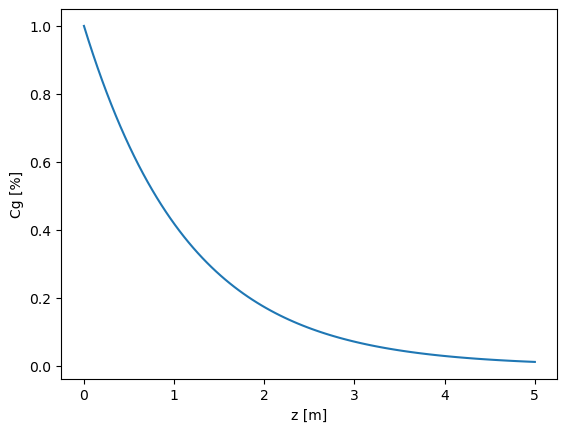

In [4]:
# Integration grid
z = np.linspace(0, 5, 100)

# Solve ODE
y = scipy.integrate.odeint(dCgdz, Cg0, z)

# Plot
plt.plot(z, y / Cg0)
plt.xlabel('z [m]')
plt.ylabel('Cg [%]')
plt.show()

## Biotrickling Filter Energy Balance

Energy stored in the substrates is balanced by the heat stored by biomass formation and metabolic heat generation.

$$\Delta H_s \Delta S^T = \Delta H_c \Delta X^T + Q_{met}$$

$$\frac{\Delta H_s}{Y_{X/S}} = \Delta H_c + \frac{Q_{met}}{\Delta X^T}$$

$$\frac{\Delta H_s}{Y_{X/S}} = \Delta H_c + \frac{1}{y_H}$$

Where $y_H$ is the amount of biomass produced per unit of heat generated.

To obtain the cooling rate for the bioreactor, the following equation is used:

$$ q_{cool} = \frac{Q_{met}}{\Delta t} = \frac{\mu_{net} X^T}{y_H}$$

In [8]:
# Metabolic Parameters
dHs = 22477 / 10e6 # kJ/mg
dHc = 15/MW_b/1000 # kJ/mg biomass

# Heat production
yH_inv = dHs/Y - dHc 
yH = 1/yH_inv # mg biomass / kJ heat produced
q_cool = mu * X / yH # kJ/l/day

print(q_cool)

1.6037893512493492e-05


# Items to Address
<li> Total volume </li>
<li> Superficial velocity </li>
<li> How to get X = f(t) </li>